<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1 - Graph Analytics **

*Problem 2*

**Question 1**. Create a graph by importing the karate club dataset from inside of the network package

Number of nodes: 34
Number of edges: 78


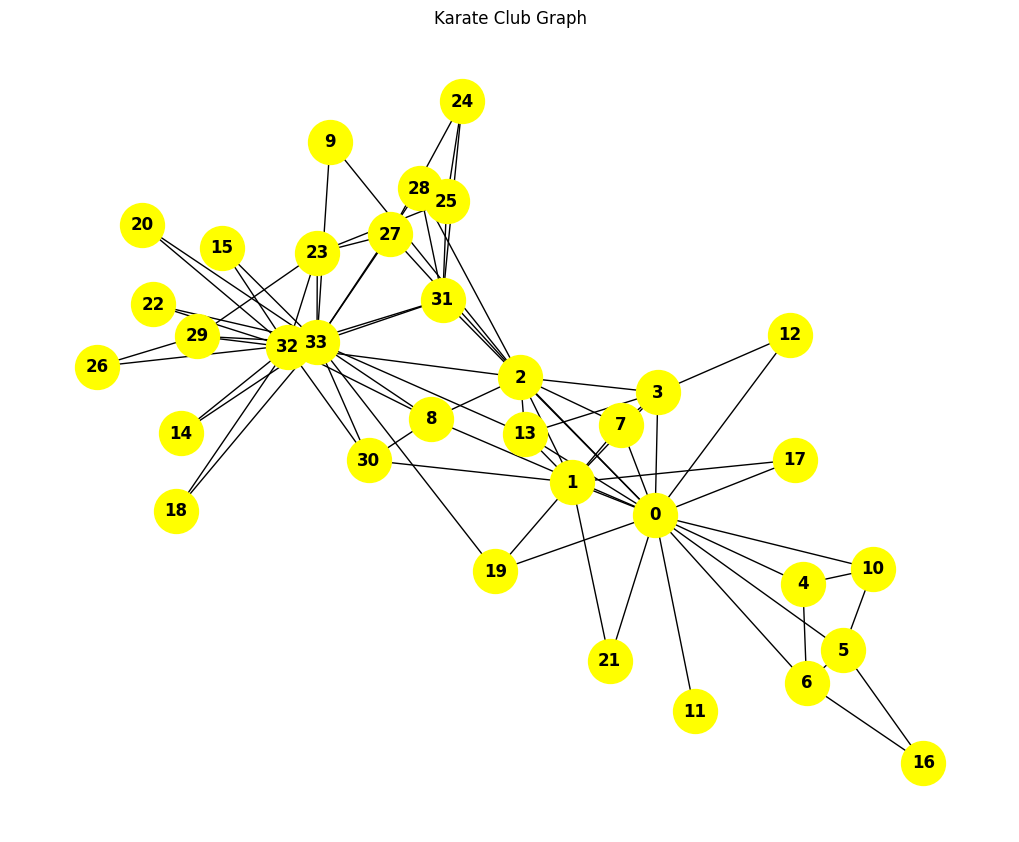

In [5]:
# Import Needed Libraries
import matplotlib.pyplot as plt
import networkx as nx

# Load the Karate Club dataset
G = nx.karate_club_graph()

# Print basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='yellow', font_weight='bold', node_size=1000)
plt.title("Karate Club Graph")
plt.show()


**Question 2** : Create a directed graph by reading this dataset from the file https://github.com/ networkx/networkx/blob/main/examples/graph/roget_dat.txt.gz

Directed Graph with 2004 nodes and 5064 edges


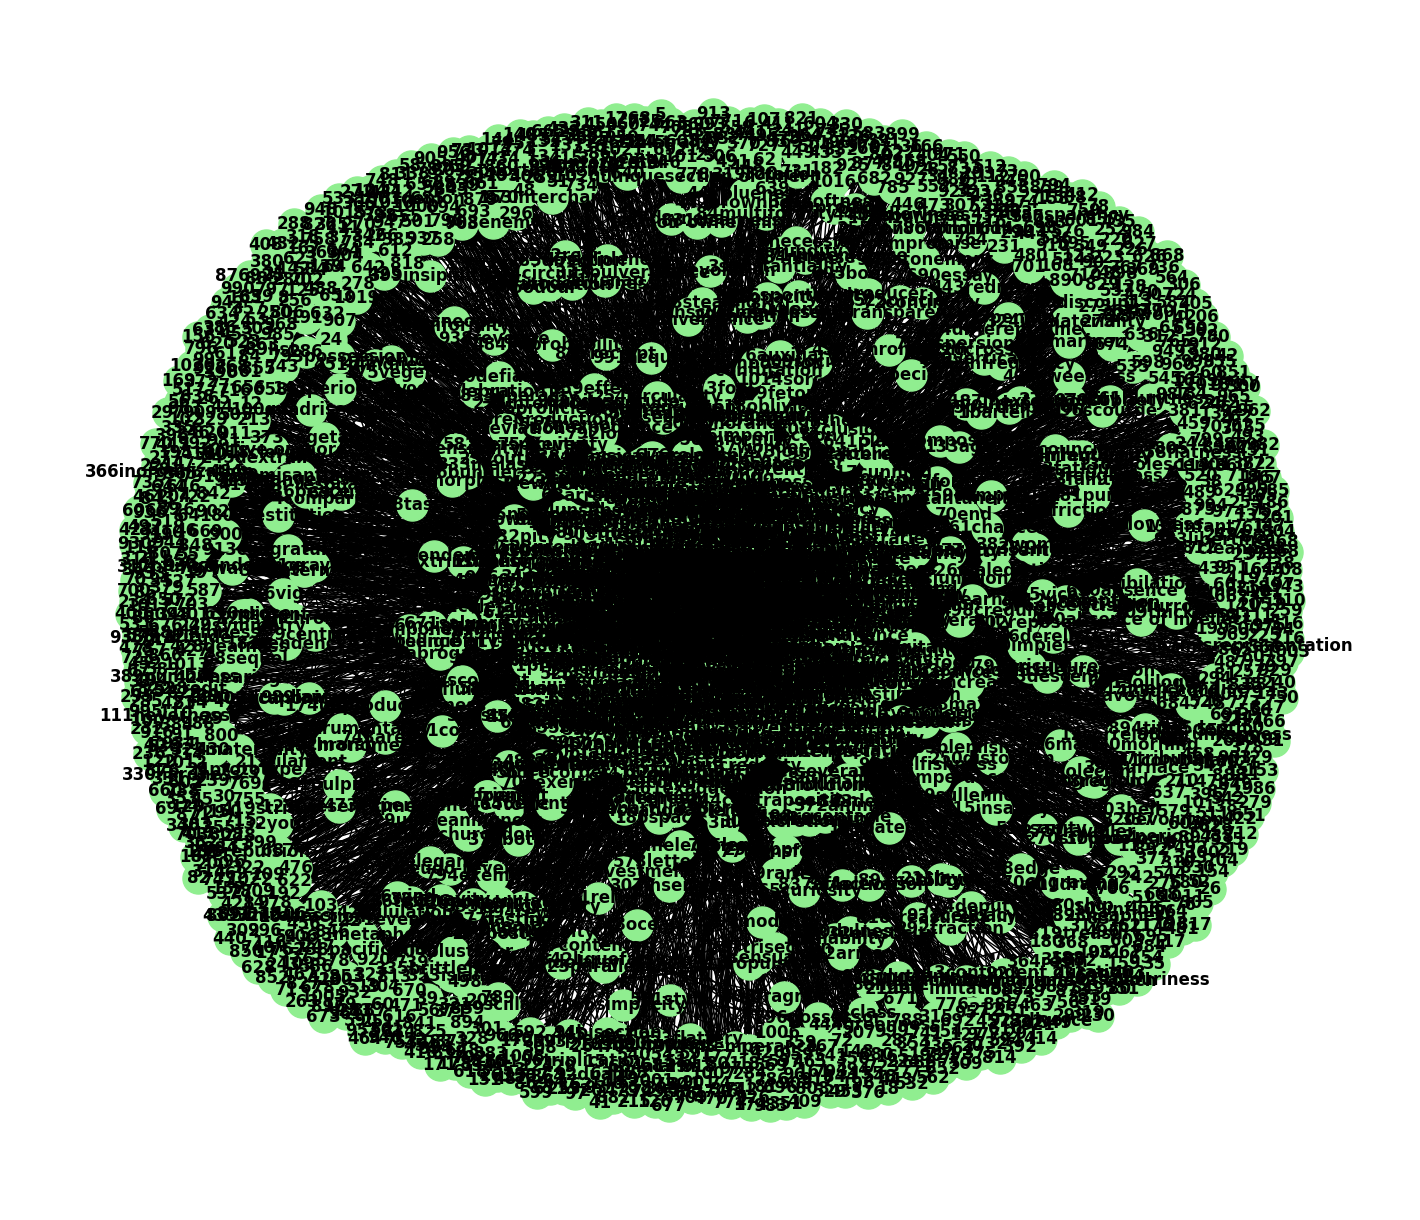

In [6]:
import networkx as nx
import requests
import gzip
import io
import matplotlib.pyplot as plt

# URL of the dataset
url = 'https://raw.githubusercontent.com/networkx/networkx/main/examples/graph/roget_dat.txt.gz'

# Download and decompress the file
response = requests.get(url)
compressed_file = io.BytesIO(response.content)
with gzip.GzipFile(fileobj=compressed_file) as f:
    data = f.read().decode('utf-8')

# Helper function to parse lines and handle line continuations
def parse_lines_with_continuations(data):
    combined_lines = []
    current_line = ""

    # Iterate over each line in the data
    for line in data.splitlines():
        line = line.strip()

        # If the line ends with a backslash, it's a continuation of the next line
        if line.endswith('\\'):
            current_line += line[:-1]  # Remove the backslash and continue
        else:
            current_line += line  # No backslash, so this is the end of the line
            combined_lines.append(current_line)
            current_line = ""  # Reset for the next line

    return combined_lines

# Helper function to parse the lines into source and targets
def parse_line(line):
    # Skip metadata lines that start with *
    if line.startswith('*'):
        return None, None

    # Split the source from the targets
    parts = line.split(':')
    if len(parts) == 2:
        source = parts[0].strip()  # Get the source node
        targets = parts[1].strip().split()  # Get the list of target nodes
        return source, targets
    return None, None

# Parse the combined lines (handling continuations) into edges
combined_lines = parse_lines_with_continuations(data)
edges = []
for line in combined_lines:
    source, targets = parse_line(line)
    if source and targets:
        for target in targets:
            edges.append((source, target))

# Create a directed graph from the parsed edges
G_directed = nx.DiGraph()
G_directed.add_edges_from(edges)

# Print some basic information about the graph
num_nodes = G_directed.number_of_nodes()
num_edges = G_directed.number_of_edges()

print(f"Directed Graph with {num_nodes} nodes and {num_edges} edges")

# Draw the directed graph
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G_directed)
nx.draw(G_directed, pos, with_labels=True, node_color="lightgreen", font_weight="bold", node_size=500, arrows=True)

# Show the plot
plt.show()

**Problem 3**


A) Calculate the diameter and network density of each network.

B) Plot the degree distribution of each network. In the case of Roget, which is a directed graph, plot the out-degree distribution only.

C) Find five nodes with the largest degree, remove these 5 nodes from the graph, and then calculate the number of connected components.

D) Discover the two nodes that are most distant from one another within each network.

E) Create the similarity matrix using Jaccard similarity for each network.


(A) Karate Club - Diameter: 5, Density: 0.13903743315508021

Roget's Thesaurus - Diameter: Not strongly connected, Density: 0.0010640273672176143


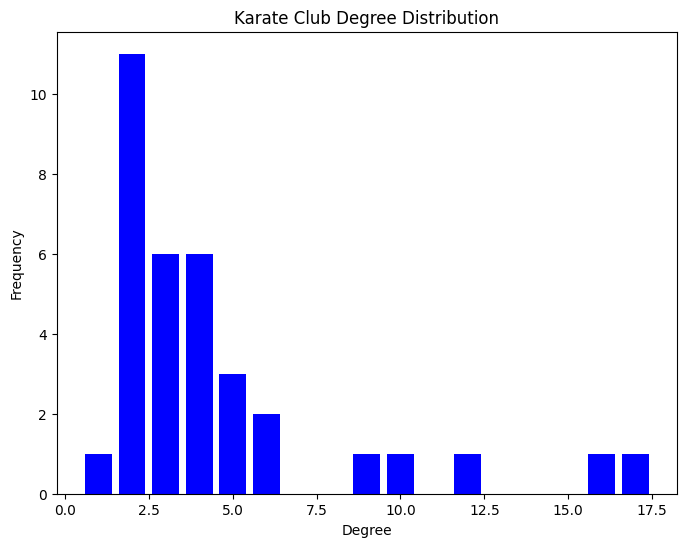

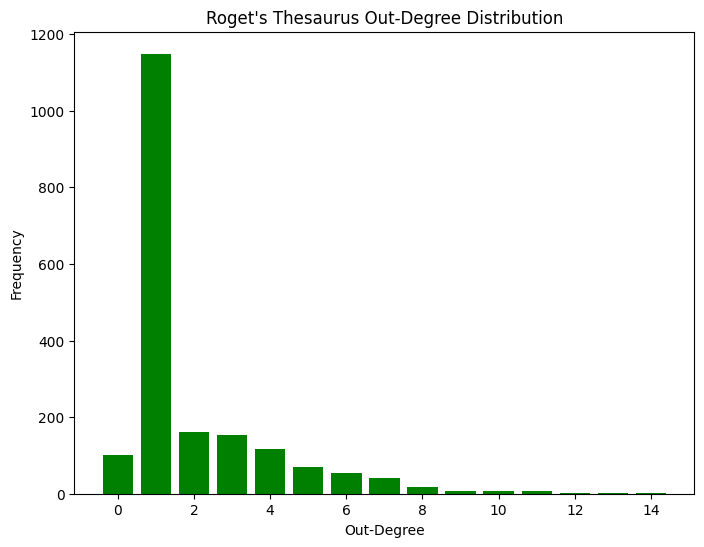

(C) Karate Club - Largest Degree Nodes: [33, 0, 32, 2, 1]

Connected Components after removal: 14

Roget's Thesaurus - Largest Degree Nodes: ['557', '660', '470', '619', '506']

Connected Components after removal: 39
(d) Karate Club: Most distant node is 14 and least distant node is 0

Roget's Thesaurus: Most distant node in largest SCC is GraphBase and least distant node is file

Jaccard Similarity for Karate Club (first 5 pairs): [((0, 32), 0.12), ((0, 33), 0.13793103448275862), ((0, 9), 0.058823529411764705), ((0, 14), 0.0), ((0, 15), 0.0)] 

Jaccard Similarity for Roget's Thesaurus (first 5 pairs): [(('742', '140'), 0.0), (('742', '778'), 0.0), (('742', '712precept:508'), 0.0), (('742', '907friend:726'), 0.0), (('742', '311'), 0.0)]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import requests
import gzip

# Create Karate Club graph (undirected)
G = nx.karate_club_graph()

# Load Roget's Thesaurus graph from the dataset
url = 'https://github.com/networkx/networkx/raw/main/examples/graph/roget_dat.txt.gz'
response = requests.get(url)

# Save the gzipped file locally
with open('roget_dat.txt.gz', 'wb') as f:
    f.write(response.content)

# Read the gzipped file and create a directed graph
DG = nx.DiGraph()
with gzip.open('roget_dat.txt.gz', 'rt') as f:
    for line in f:
        if not line.strip() or line.startswith('#'):
            continue
        parts = line.split()
        for i in range(len(parts) - 1):
            DG.add_edge(parts[i], parts[i + 1])

# A) Calculate diameter and network density for both networks
# Karate Club graph (undirected)
karate_diameter = nx.diameter(G)
karate_density = nx.density(G)

# Roget's Thesaurus graph (directed)
try:
    roget_diameter = nx.diameter(DG)
except nx.NetworkXError:
    roget_diameter = "Not strongly connected"
roget_density = nx.density(DG)

# Output for part (a)
print(f"\033[1m(A) Karate Club - Diameter: {karate_diameter}, Density: {karate_density}\033[0m\n")

print(f"\033[1mRoget's Thesaurus - Diameter: {roget_diameter}, Density: {roget_density}\033[0m")


# B) Degree distribution plot for both networks
# Karate Club graph
karate_degrees = [G.degree(n) for n in G.nodes()]
karate_degree_count = collections.Counter(karate_degrees)
plt.figure(figsize=(8, 6))
plt.bar(karate_degree_count.keys(), karate_degree_count.values(), color='blue')
plt.title("Karate Club Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Roget's Thesaurus out-degree distribution
roget_out_degrees = [DG.out_degree(n) for n in DG.nodes()]
roget_out_degree_count = collections.Counter(roget_out_degrees)
plt.figure(figsize=(8, 6))
plt.bar(roget_out_degree_count.keys(), roget_out_degree_count.values(), color='green')
plt.title("Roget's Thesaurus Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.show()

# C) Find five nodes with the largest degree, remove them, and calculate connected components
# Karate Club graph
karate_largest_deg_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
G_removed_karate = G.copy()
G_removed_karate.remove_nodes_from([n[0] for n in karate_largest_deg_nodes])
karate_connected_components = nx.number_connected_components(G_removed_karate)

# Roget's Thesaurus graph (out-degree based)
roget_largest_deg_nodes = sorted(DG.out_degree, key=lambda x: x[1], reverse=True)[:5]
DG_removed_roget = DG.copy()
DG_removed_roget.remove_nodes_from([n[0] for n in roget_largest_deg_nodes])
roget_connected_components = nx.number_weakly_connected_components(DG_removed_roget)

# Output for part C

# Karate Club results with bold text and space
print(f"\033[1m(C) Karate Club - Largest Degree Nodes: {[n[0] for n in karate_largest_deg_nodes]}\033[0m\n")
print(f"\033[1mConnected Components after removal: {karate_connected_components}\033[0m\n")

# Roget's Thesaurus results with bold text and space
print(f"\033[1mRoget's Thesaurus - Largest Degree Nodes: {[n[0] for n in roget_largest_deg_nodes]}\033[0m\n")
print(f"\033[1mConnected Components after removal: {roget_connected_components}\033[0m")

# D) Discover the two nodes that are most distant from one another within each network
# Karate Club graph
if len(G) > 0:
    karate_eccentricity = nx.eccentricity(G)
    karate_most_distant = max(karate_eccentricity, key=karate_eccentricity.get)
    karate_least_distant = min(karate_eccentricity, key=karate_eccentricity.get)
    print(f"\033[1m(D) Karate Club: Most distant node is {karate_most_distant} and least distant node is {karate_least_distant}\033[0m\n")



# Roget's Thesaurus graph
sccs = list(nx.strongly_connected_components(DG))
if sccs:
    largest_scc = max(sccs, key=len)
    DG_scc = DG.subgraph(largest_scc)
    roget_eccentricity = nx.eccentricity(DG_scc)
    roget_most_distant = max(roget_eccentricity, key=roget_eccentricity.get)
    roget_least_distant = min(roget_eccentricity, key=roget_eccentricity.get)
    print(f"\033[1mRoget's Thesaurus: Most distant node in largest SCC is {roget_most_distant} and least distant node is {roget_least_distant}\033[0m\n")

else:
    print("\033[1mRoget's Thesaurus has no strongly connected components.\033[0m\n")


# (e) Create similarity matrix using Jaccard similarity for each network
# Karate Club graph
karate_similarity = nx.jaccard_coefficient(G)
karate_similarity_matrix = {(u, v): p for u, v, p in karate_similarity}

# Roget's Thesaurus graph (using undirected version)
roget_similarity = nx.jaccard_coefficient(DG.to_undirected())
roget_similarity_matrix = {(u, v): p for u, v, p in roget_similarity}

# Output for part E

# Karate Club Jaccard Similarity
print(f"\033[1mJaccard Similarity for Karate Club (first 5 pairs):\033[0m", list(karate_similarity_matrix.items())[:5], "\n")

# Roget's Thesaurus Jaccard Similarity
print(f"\033[1mJaccard Similarity for Roget's Thesaurus (first 5 pairs):\033[0m", list(roget_similarity_matrix.items())[:5])
